### Imports

In [130]:
import pandas as pd
import dataset_tools as dt

## Preparing data

### Loading dataset

In [ ]:
aggregated_dataset = pd.read_csv('per_day_participant_dataset_co.csv')

In [ ]:
aggregated_dataset.tail()

In [ ]:
# Pares column Unnamed: 0
aggregated_dataset = dt.reformat_aggregated_data(aggregated_dataset)

In [ ]:
# avarage the first 3 columns using the counts
aggregated_dataset = dt.avarage_data(aggregated_dataset, dt.var_names[0:4])

In [ ]:
aggregated_dataset.head()

In [ ]:
# save the dataset
aggregated_dataset.to_csv('aggregated_dataset.csv', index=False)

### Counting missing values

In [ ]:
# count the number of rows where mood_count is 0
zero_mood_count = aggregated_dataset[aggregated_dataset['mood_count'] == 0].shape[0]
print('Number of rows where mood_count is 0:', zero_mood_count, 'out of', aggregated_dataset.shape[0])

In [ ]:
counts_of_empty_mood = aggregated_dataset[aggregated_dataset['mood_count'] == 0].groupby('participant_id').size()
counts_of_empty_mood


In [ ]:
partecipants = aggregated_dataset['participant_id'].unique()
current_participant = partecipants[0]
# count lenght of empty mood sequences
empty_mood_sequences = {}
"""
Dictionry with the form of:
{
    'participant_id': {
        'length_sequence': count
    }
}

Example:

{
    'AS14.01': {
        1: 10,
        2: 5
    },
    'AS14.02': {
        1: 7,
        2: 3
    }
}
"""


for participant in partecipants:
    current_length = 0
    for index, row in aggregated_dataset[aggregated_dataset['participant_id'] == participant].iterrows():
        if row['mood_count'] == 0:
            current_length += 1
            if index == len(aggregated_dataset[aggregated_dataset['participant_id'] == participant]) - 1:
                
                if participant not in empty_mood_sequences:
                    empty_mood_sequences[participant] = {}
                if current_length not in empty_mood_sequences[participant]:
                    empty_mood_sequences[participant][current_length] = 0
                empty_mood_sequences[participant][current_length] += 1

                current_length = 0
        else:
            if current_length != 0:
                if participant not in empty_mood_sequences:
                    empty_mood_sequences[participant] = {}
                if current_length not in empty_mood_sequences[participant]:
                    empty_mood_sequences[participant][current_length] = 0
                empty_mood_sequences[participant][current_length] += 1
            current_length = 0

empty_mood_sequences

In [ ]:
# plot mood_count per participant
import matplotlib.pyplot as plt
import os

if not os.path.exists('participant_mood_count'):
    os.makedirs('participant_mood_count')

for participant in partecipants:
    plt.plot(aggregated_dataset[aggregated_dataset['participant_id'] == participant]['date_time'], aggregated_dataset[aggregated_dataset['participant_id'] == participant]['mood_count'])
    plt.title('Participant ' + participant + ' mood count')
    plt.savefig('participant_mood_count/' + participant + '_mood_count.png')
    plt.close()

In [ ]:
# plot per partecipant the sum of the variables that end with _count
for participant in partecipants:
    plt.plot(aggregated_dataset[aggregated_dataset['participant_id'] == participant]['date_time'], aggregated_dataset[aggregated_dataset['participant_id'] == participant].iloc[:, 3::2].sum(axis=1))
    plt.title('Participant ' + participant + ' sum of the variables that end with _count')
    plt.show()




In [ ]:
#Plot both
def plot_counts_per_participant(df):
    partecipants = df['participant_id'].unique()
    for participant in partecipants:
        plt.plot(df[df['participant_id'] == participant]['date_time'], df[df['participant_id'] == participant]['mood_count'])
        plt.title('Participant ' + participant + ' mood count')
        plt.show()
        plt.plot(df[df['participant_id'] == participant]['date_time'], df[df['participant_id'] == participant].iloc[:, 3::2].sum(axis=1))
        plt.title('Participant ' + participant + ' sum of the _count variables')
        plt.show()


plot_counts_per_participant(aggregated_dataset)

## Cleaning

In [ ]:
#load the dataset
aggregated_dataset = pd.read_csv('aggregated_dataset.csv')

In [ ]:
aggregated_dataset['sum_of_counts'] = aggregated_dataset.iloc[:, 3::2].sum(axis=1)
aggregated_dataset.head()

In [ ]:
# strip the first rows and the last rows with mood_count = 0 per participant
aggregated_dataset_cleaned = pd.DataFrame()
for participant in partecipants:
    participant_data = aggregated_dataset[aggregated_dataset['participant_id'] == participant]
    participant_data.reset_index(drop=True, inplace=True)
    first_non_zero_mood = participant_data[participant_data['mood_count'] != 0].index[0]
    last_non_zero_mood = participant_data[participant_data['mood_count'] != 0].index[-1]
    aggregated_dataset_cleaned = pd.concat([aggregated_dataset_cleaned, participant_data[first_non_zero_mood:last_non_zero_mood+1]])

In [ ]:
print('Original dataset shape:', aggregated_dataset.shape)
print('Cleaned dataset shape:', aggregated_dataset_cleaned.shape)

In [95]:
# remove the period of 10 or more consecutive lower sum of the variables that end with _count per partecipant, splitting the dataset in batches. The treshold depends on the mean of the sum of the variables that end with _count
aggregated_dataset_cleaned = aggregated_dataset.copy(deep=True)

aggregated_dataset_cleaned.reset_index(drop=True, inplace=True)
aggregated_dataset_cleaned.head()




,date_time,participant_id,mood,mood_count,circumplex.arousal,circumplex.arousal_count,circumplex.valence,circumplex.valence_count,activity,activity_count,...,appCat.social_count,appCat.travel,appCat.travel_count,appCat.unknown,appCat.unknown_count,appCat.utilities,appCat.utilities_count,appCat.weather,appCat.weather_count,sum_of_counts
0,2014-02-17,AS14.01,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,2
1,2014-02-18,AS14.01,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,1
2,2014-02-19,AS14.01,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,9
3,2014-02-20,AS14.01,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,5
4,2014-02-21,AS14.01,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,1


In [123]:
#importing math
import math


def split_dataset(df, max_empty_lenght=4, min_count=10):
    partecipants = df['participant_id'].unique()
    splitted_dataset = pd.DataFrame()
    for participant in partecipants:
        participant_data = df[df['participant_id'] == participant]
        participant_data.reset_index(drop=True, inplace=True)
        mean_sum_of_counts = participant_data['sum_of_counts'].mean()
        #std_sum_of_counts = participant_data['sum_of_counts'].std()
        treshold = max(mean_sum_of_counts - 3*math.sqrt(mean_sum_of_counts), min_count) # 99% confidence interval assuming poisson distribution approximated by normal distribution
        print('threshold for participant', participant, 'is', treshold)
        current_length = 0
        batch_number = 0
        previous_cut = 0
        for index, row in participant_data.iterrows():
            if row['sum_of_counts'] <= treshold:
                current_length += 1

            elif current_length > max_empty_lenght:
                batch = participant_data[previous_cut:index-current_length+(max_empty_lenght if previous_cut else 0)].copy(deep=True)
                batch['batch'] = batch_number
                splitted_dataset = pd.concat([splitted_dataset, batch])

                batch_number += 1 if previous_cut else 0
                current_length = 0
                previous_cut = index
            else:
                current_length = 0
            if index == len(participant_data) - 1:
                if current_length <= max_empty_lenght:
                    batch = participant_data[previous_cut:].copy(deep=True)
                    batch['batch'] = batch_number
                    splitted_dataset = pd.concat([splitted_dataset, batch])
    return splitted_dataset

splitted_dataset = split_dataset(aggregated_dataset_cleaned)

threshold for participant AS14.01 is 231.45798096016435
threshold for participant AS14.02 is 170.49654644427488
threshold for participant AS14.03 is 138.0517125882054
threshold for participant AS14.05 is 161.50014206105106
threshold for participant AS14.06 is 178.48920329446207
threshold for participant AS14.07 is 267.1223037337848
threshold for participant AS14.08 is 71.07944645527654
threshold for participant AS14.09 is 104.05577229829386
threshold for participant AS14.12 is 182.38103580497233
threshold for participant AS14.13 is 206.58788537486453
threshold for participant AS14.14 is 86.31809494001013
threshold for participant AS14.15 is 17.270192710576993
threshold for participant AS14.16 is 29.180994394672158
threshold for participant AS14.17 is 160.03864238041172
threshold for participant AS14.19 is 109.85192557548521
threshold for participant AS14.20 is 25.97273435663387
threshold for participant AS14.23 is 233.25380783603717
threshold for participant AS14.24 is 186.465311831847

In [124]:
print('Original dataset shape:', aggregated_dataset_cleaned.shape)
print('Splitted dataset shape:', splitted_dataset.shape)

Original dataset shape: (2154, 41)
Splitted dataset shape: (1024, 42)


In [125]:
# print lenght per batch
splitted_dataset.groupby(['participant_id', 'batch']).size()

participant_id  batch
AS14.01         0        46
AS14.03         0        49
AS14.05         0        53
AS14.06         0        45
AS14.08         0        54
AS14.12         0        40
AS14.13         0        52
AS14.14         0        40
                1         3
AS14.15         0        56
AS14.16         0        54
AS14.17         0        46
AS14.19         0        45
AS14.23         0        44
AS14.24         0        56
AS14.25         0        31
AS14.26         0        48
AS14.27         0        43
AS14.28         0        38
AS14.29         0        44
AS14.30         0        47
AS14.32         0        44
AS14.33         0        46
dtype: int64

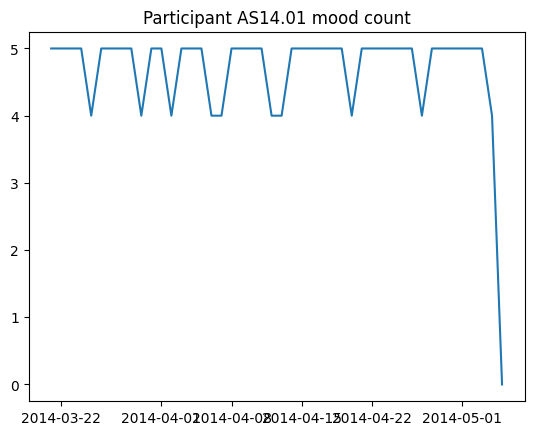

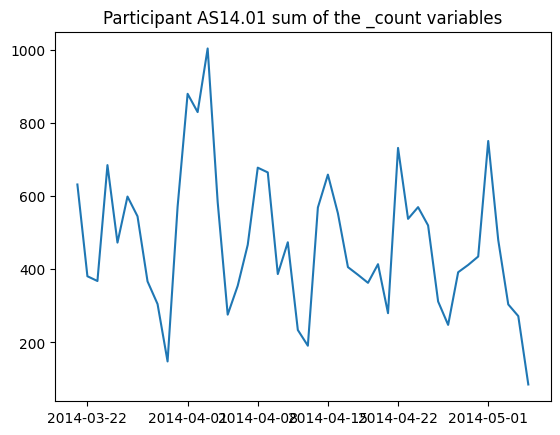

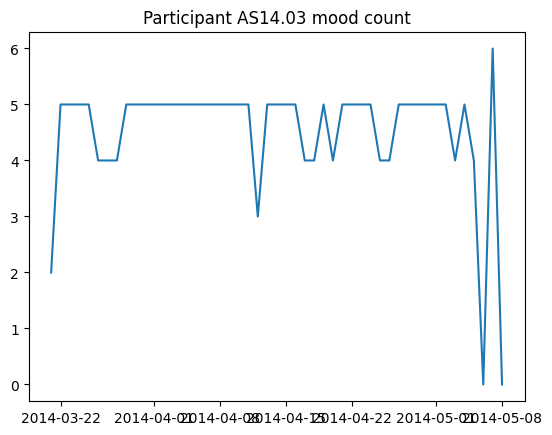

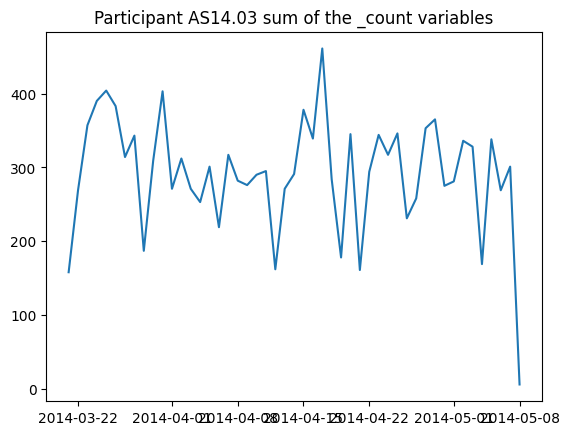

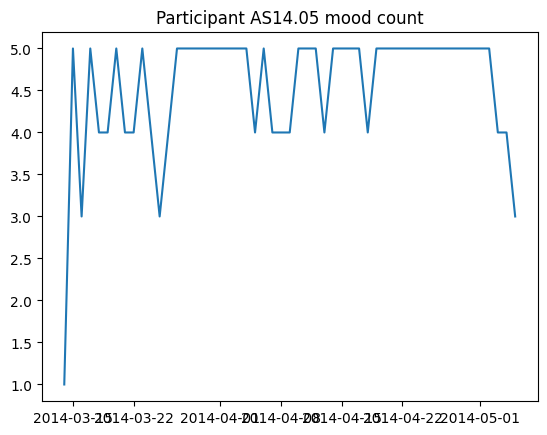

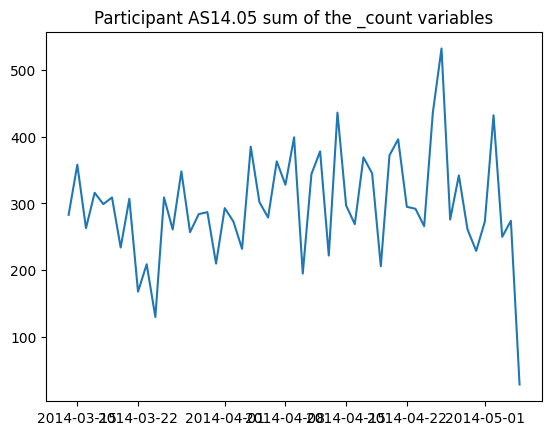

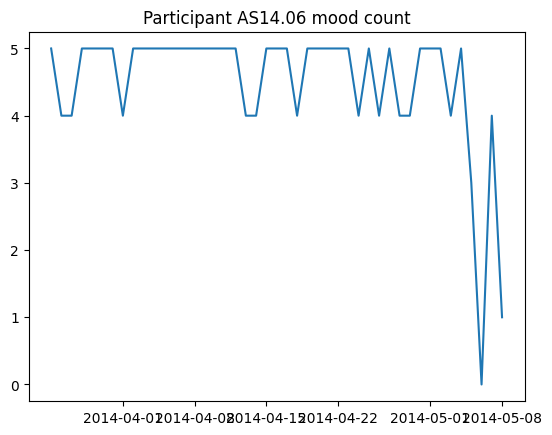

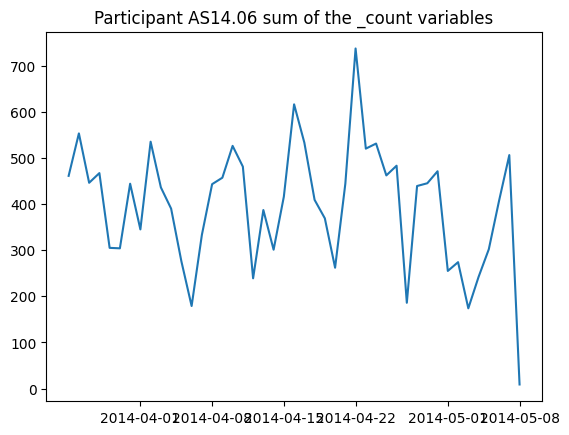

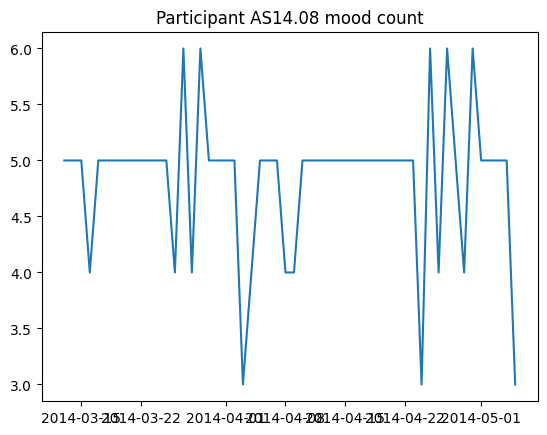

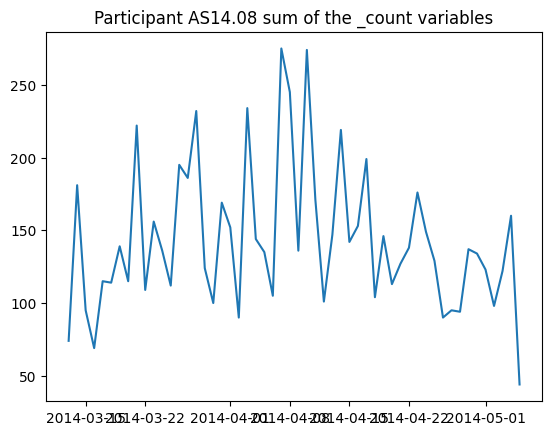

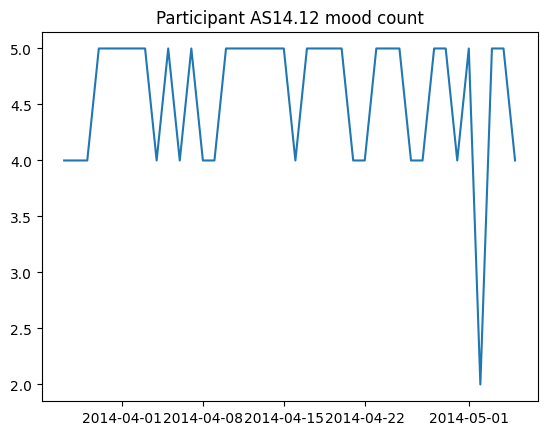

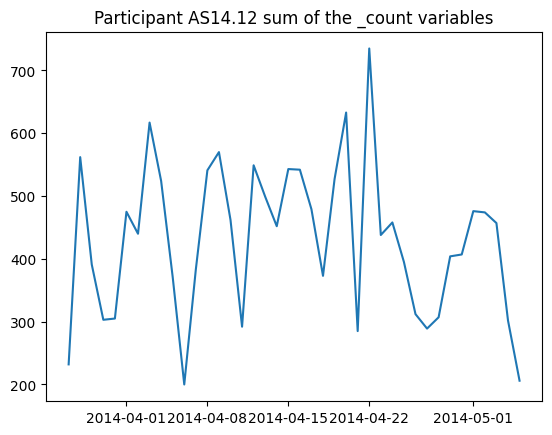

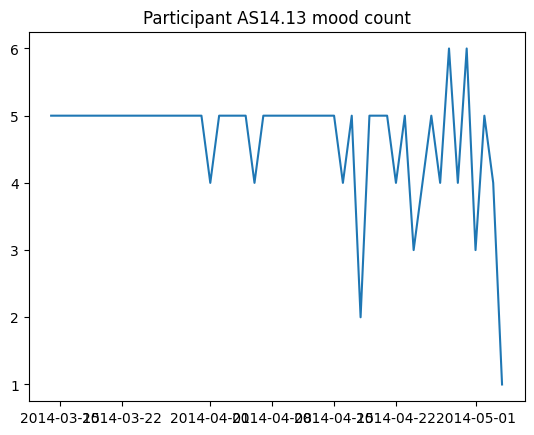

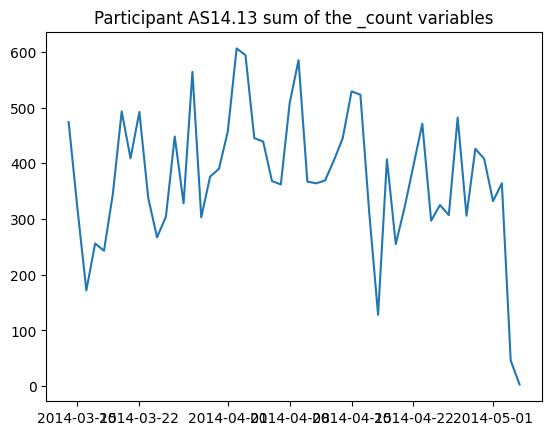

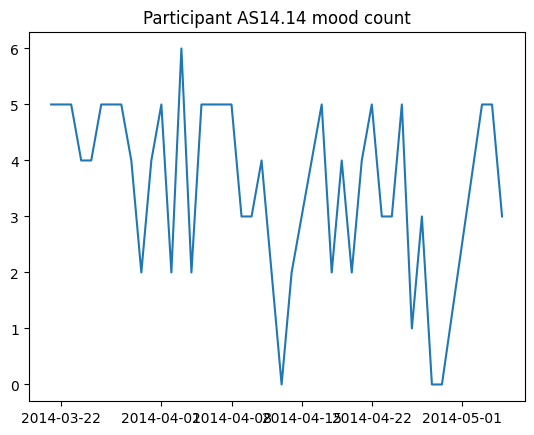

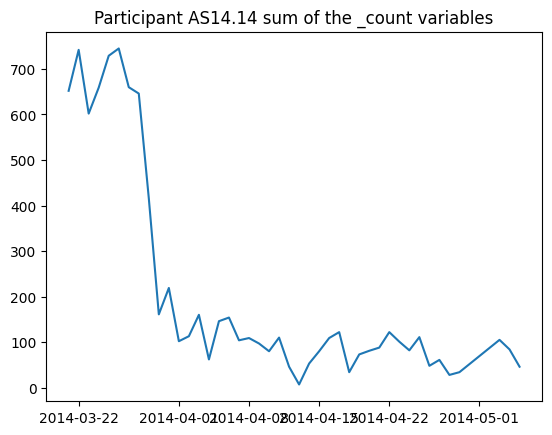

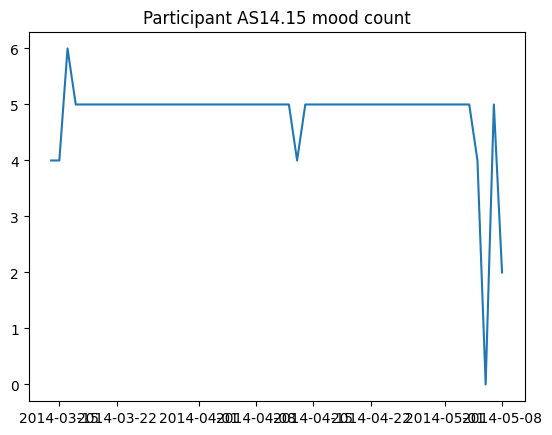

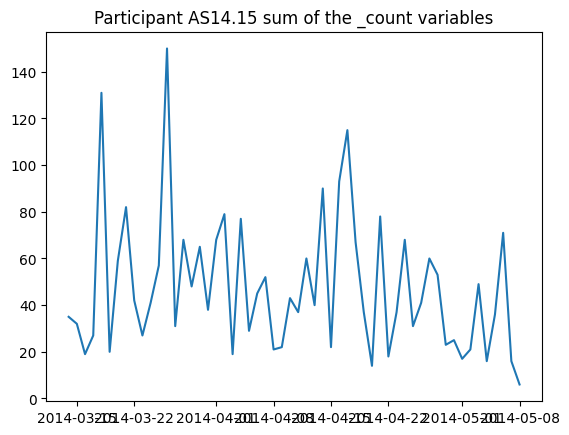

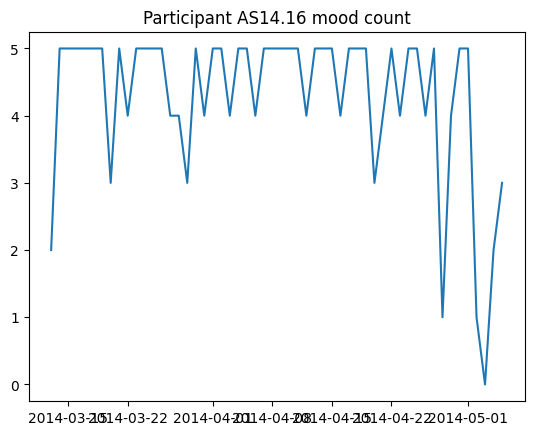

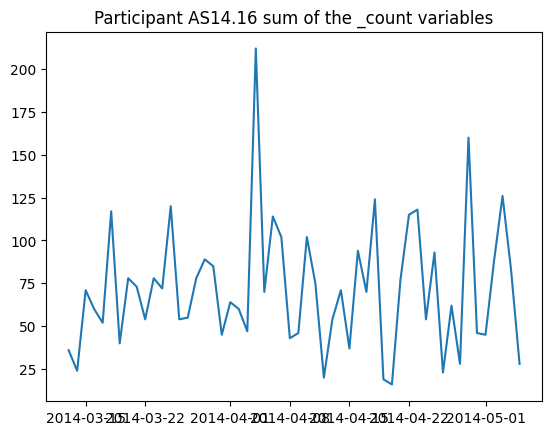

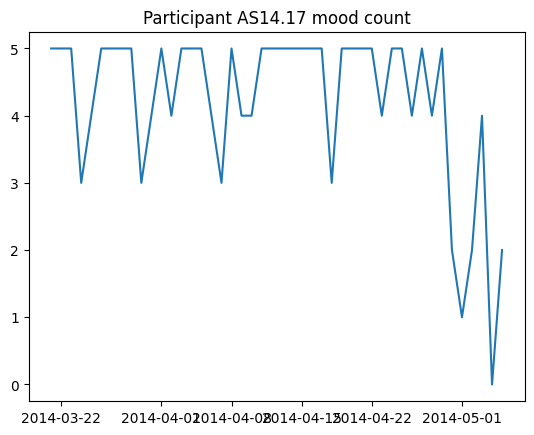

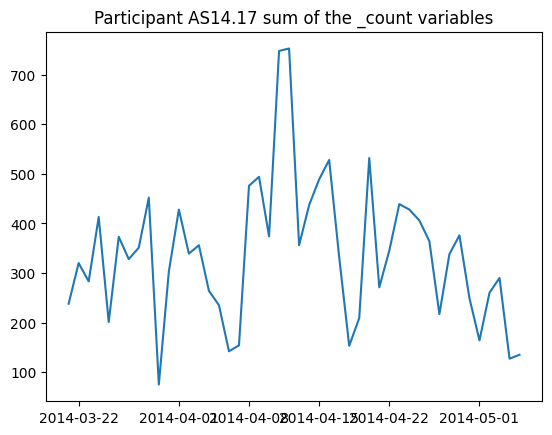

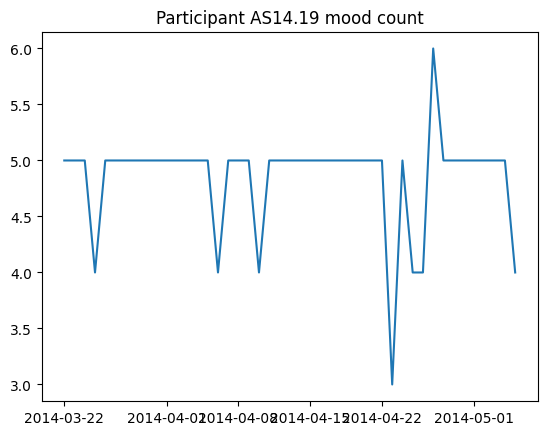

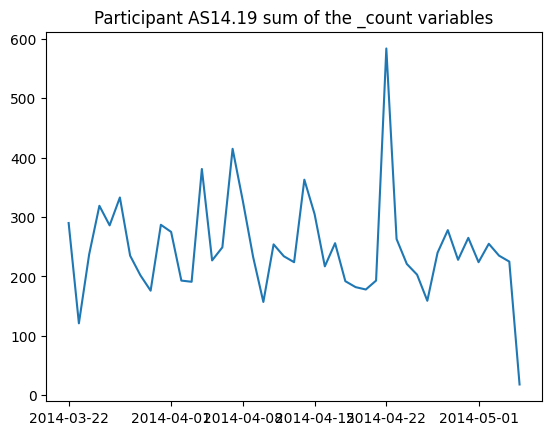

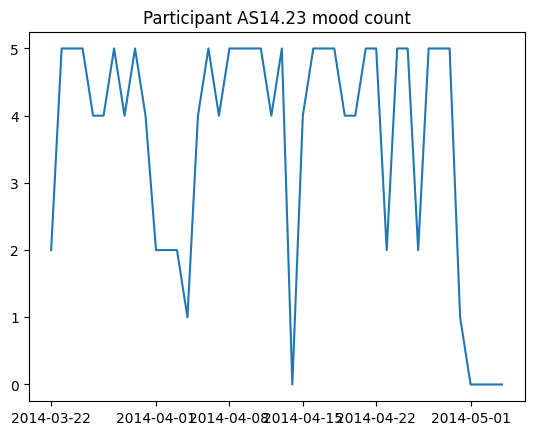

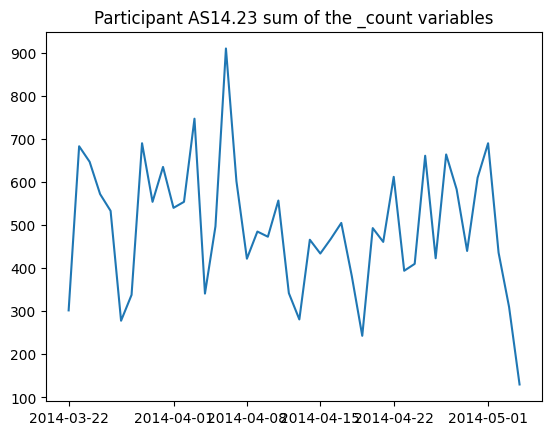

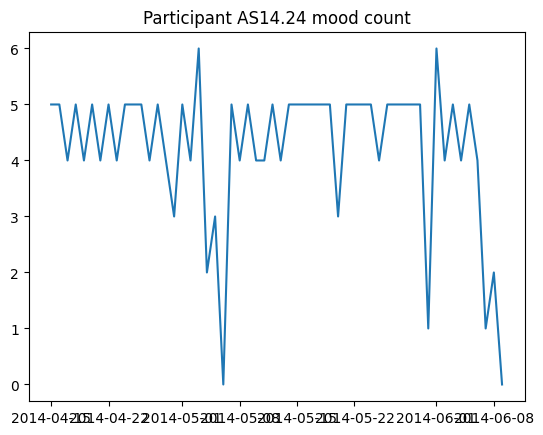

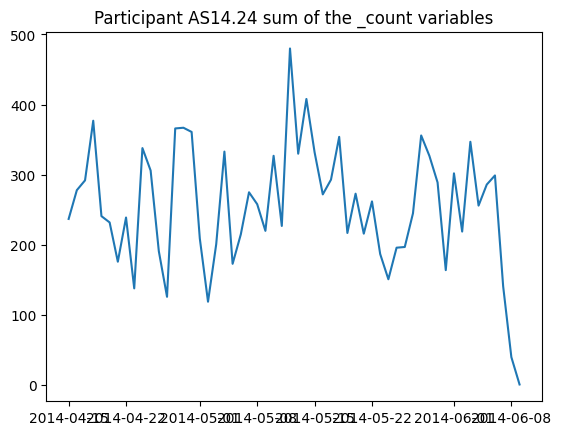

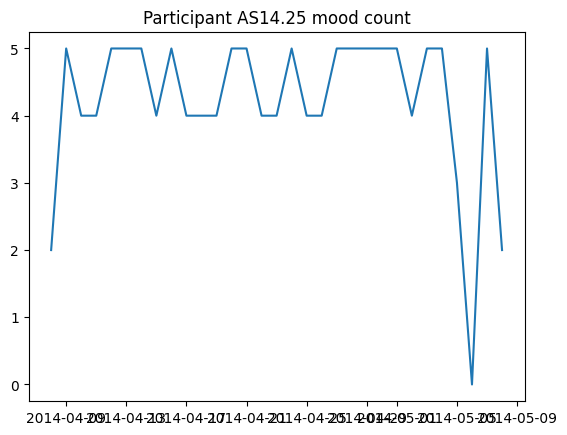

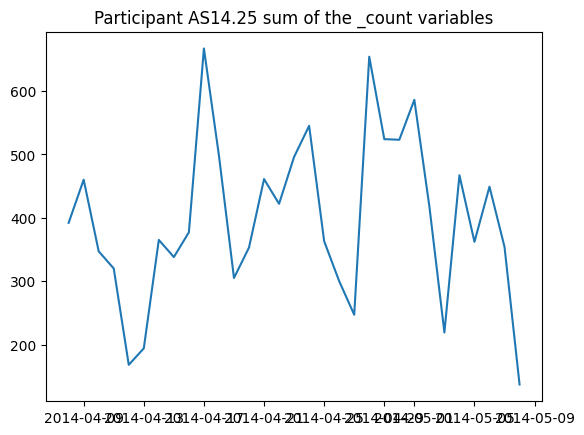

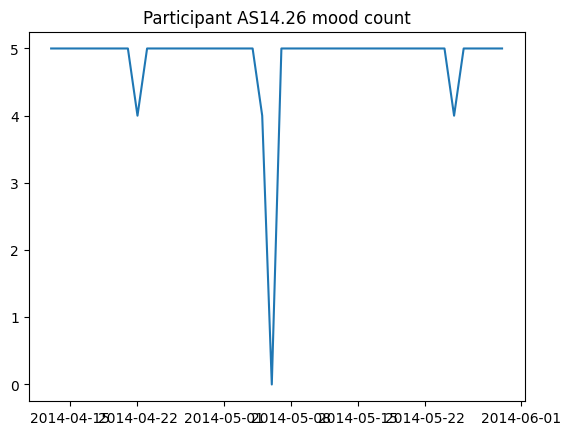

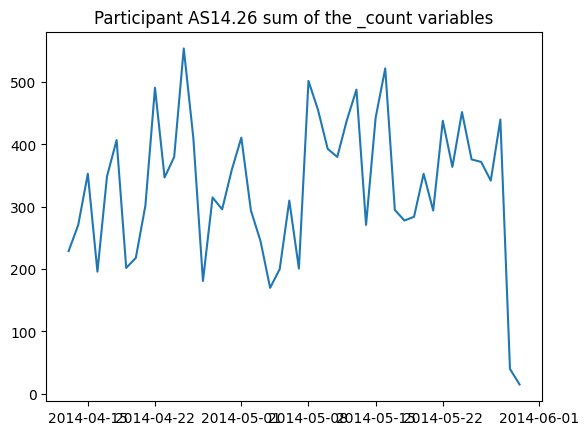

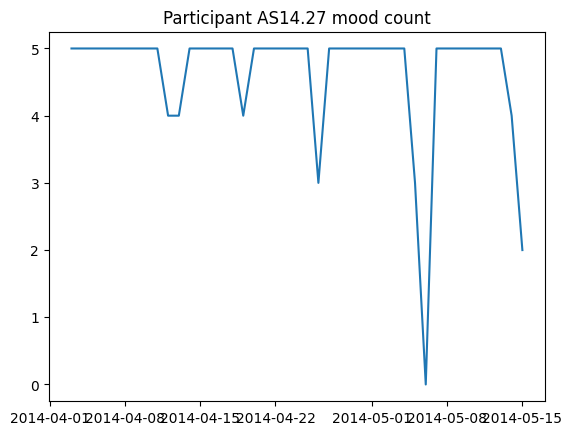

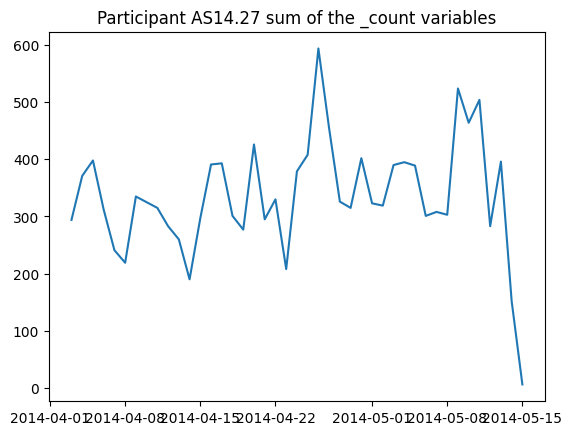

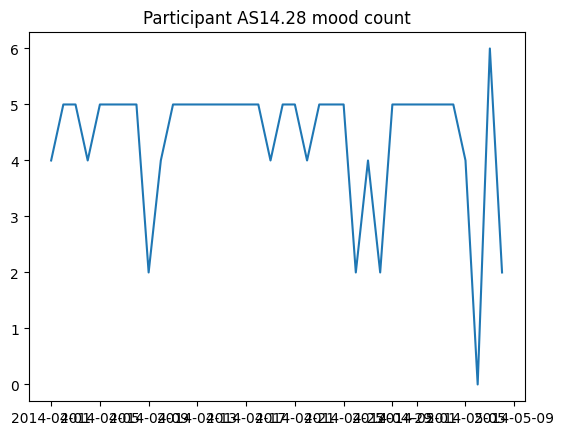

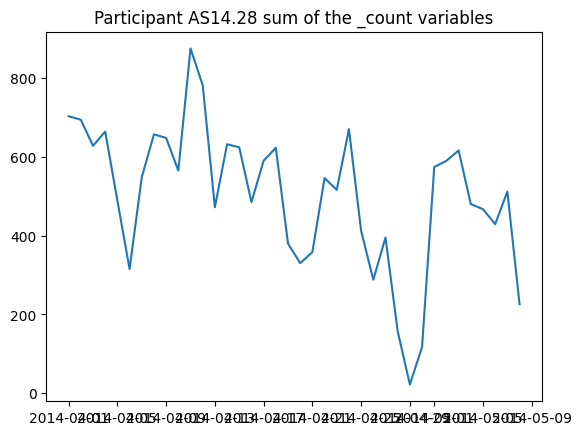

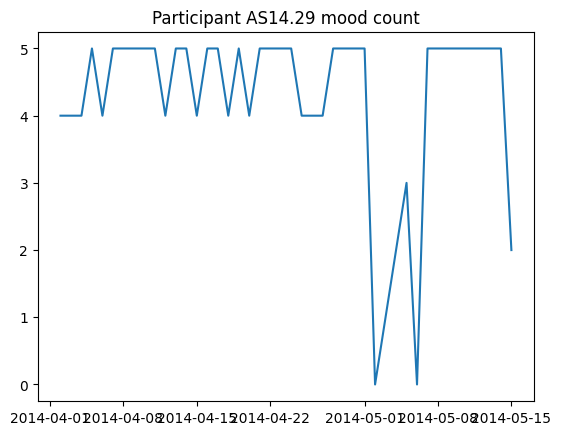

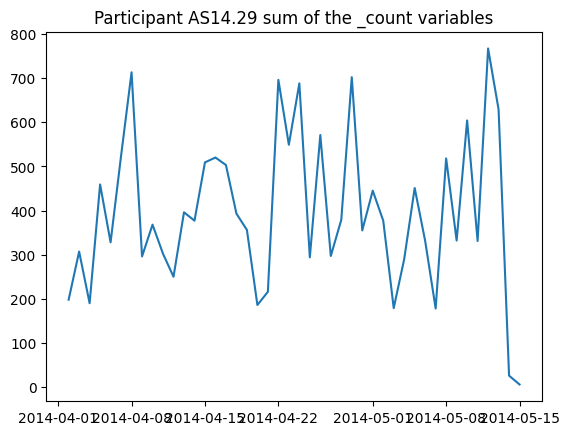

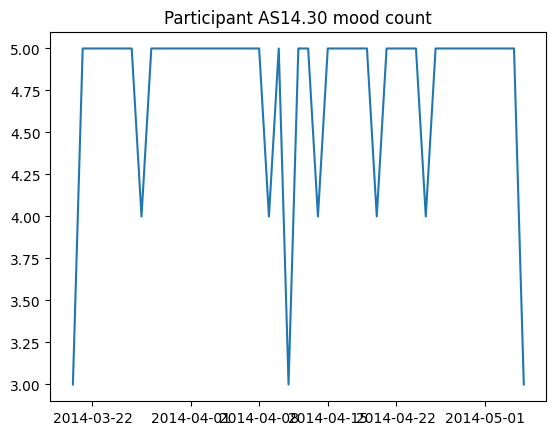

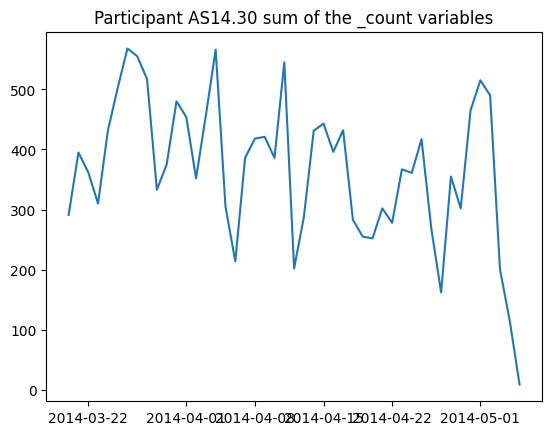

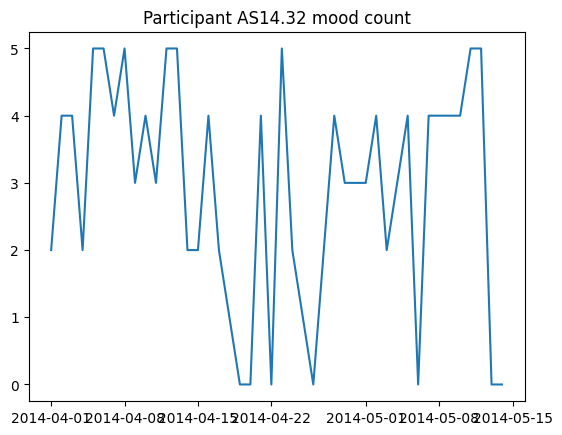

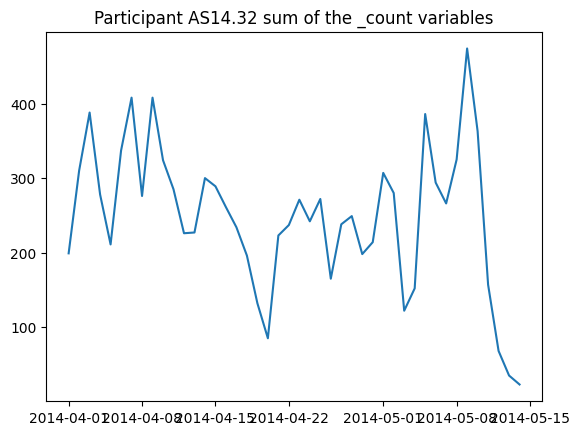

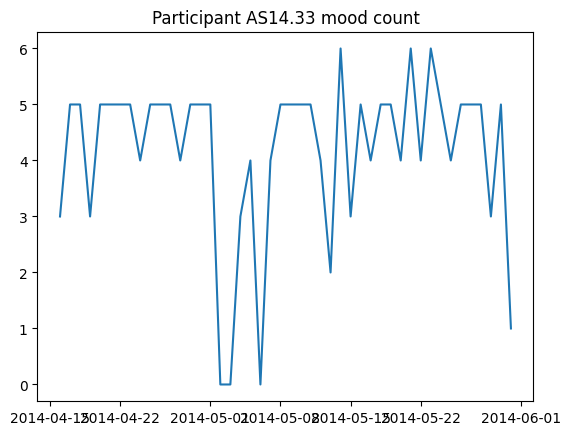

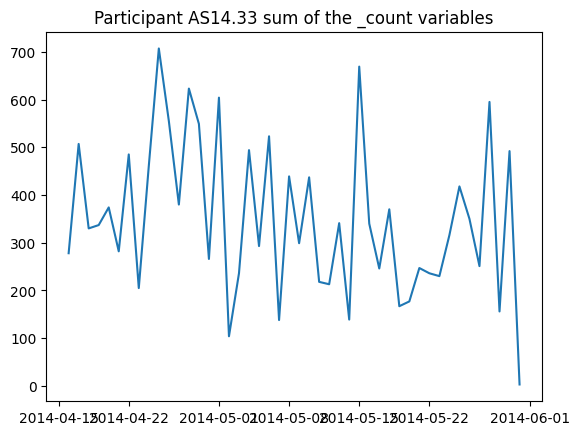

In [126]:
#plot counts
splitted_dataset['date_time'] = pd.to_datetime(splitted_dataset['date_time'])
dt.plot_counts_per_participant(splitted_dataset)

In [127]:
reordered_columns = splitted_dataset.columns.to_list()[0:2]+splitted_dataset.columns.to_list()[-1:] + splitted_dataset.columns.to_list()[2:-1]
splitted_dataset = splitted_dataset[reordered_columns]

In [128]:
splitted_dataset[splitted_dataset['participant_id'] == 'AS14.01']

,date_time,participant_id,batch,mood,mood_count,circumplex.arousal,circumplex.arousal_count,circumplex.valence,circumplex.valence_count,activity,...,appCat.social_count,appCat.travel,appCat.travel_count,appCat.unknown,appCat.unknown_count,appCat.utilities,appCat.utilities_count,appCat.weather,appCat.weather_count,sum_of_counts
32,2014-03-21,AS14.01,0,6.20,5,0.200000,5,0.200000,5,0.134050,...,60,915.445,13,0.000,0,598.754,26,0.000,0,632
33,2014-03-22,AS14.01,0,6.40,5,0.600000,5,0.500000,4,0.236880,...,12,37.305,1,0.000,0,117.621,3,0.000,0,381
34,2014-03-23,AS14.01,0,6.80,5,0.200000,5,0.800000,5,0.142741,...,18,0.000,0,0.000,0,30.086,1,30.386,1,368
35,2014-03-24,AS14.01,0,6.00,5,0.800000,5,0.000000,5,0.078961,...,43,419.805,5,0.000,0,178.732,2,0.000,0,685
36,2014-03-25,AS14.01,0,6.75,4,0.500000,4,0.500000,4,0.098374,...,28,0.000,0,235.223,8,222.893,10,0.000,0,473
37,2014-03-26,AS14.01,0,6.60,5,-0.200000,5,0.600000,5,0.101308,...,37,0.000,0,0.000,0,33.365,1,0.000,0,599
38,2014-03-27,AS14.01,0,7.00,5,0.200000,5,0.800000,5,0.159511,...,13,47.314,2,0.000,0,179.029,11,0.000,0,545
39,2014-03-28,AS14.01,0,6.40,5,-0.600000,5,0.600000,5,0.095698,...,20,1133.009,19,0.000,0,301.717,10,0.000,0,367
40,2014-03-29,AS14.01,0,8.00,5,0.200000,5,1.000000,5,0.068203,...,8,52.435,3,0.000,0,600.637,24,0.000,0,305
41,2014-03-30,AS14.01,0,7.50,4,-0.500000,4,0.750000,4,0.049093,...,3,0.000,0,66.477,2,38.296,1,0.000,0,148


In [129]:
# save the dataset
splitted_dataset.to_csv('splitted_dataset.csv', index=False)

## Imputing missing days

In [131]:
# load the dataset
splitted_dataset = pd.read_csv('splitted_dataset.csv')

In [136]:
splitted_dataset.groupby(['participant_id', 'batch']).size()

participant_id  batch
AS14.01         0        46
AS14.03         0        49
AS14.05         0        53
AS14.06         0        45
AS14.08         0        54
AS14.12         0        40
AS14.13         0        52
AS14.14         0        40
                1         3
AS14.15         0        56
AS14.16         0        54
AS14.17         0        46
AS14.19         0        45
AS14.23         0        44
AS14.24         0        56
AS14.25         0        31
AS14.26         0        48
AS14.27         0        43
AS14.28         0        38
AS14.29         0        44
AS14.30         0        47
AS14.32         0        44
AS14.33         0        46
dtype: int64

In [138]:
# count the number of rows where mood_count is 0 per participant and batch
zero_mood_count = splitted_dataset[splitted_dataset['mood_count'] == 0].groupby(['participant_id', 'batch']).size()

In [139]:
zero_mood_count

participant_id  batch
AS14.01         0        1
AS14.03         0        2
AS14.06         0        1
AS14.14         0        3
AS14.15         0        1
AS14.16         0        1
AS14.17         0        1
AS14.23         0        5
AS14.24         0        2
AS14.25         0        1
AS14.26         0        1
AS14.27         0        1
AS14.28         0        1
AS14.29         0        2
AS14.32         0        7
AS14.33         0        3
dtype: int64

In [142]:
splitted_dataset.head()



,date_time,participant_id,batch,mood,mood_count,circumplex.arousal,circumplex.arousal_count,circumplex.valence,circumplex.valence_count,activity,...,appCat.social_count,appCat.travel,appCat.travel_count,appCat.unknown,appCat.unknown_count,appCat.utilities,appCat.utilities_count,appCat.weather,appCat.weather_count,sum_of_counts
0,2014-03-21,AS14.01,0,6.20,5,0.2,5,0.2,5,0.134050,...,60,915.445,13,0.000,0,598.754,26,0.000,0,632
1,2014-03-22,AS14.01,0,6.40,5,0.6,5,0.5,4,0.236880,...,12,37.305,1,0.000,0,117.621,3,0.000,0,381
2,2014-03-23,AS14.01,0,6.80,5,0.2,5,0.8,5,0.142741,...,18,0.000,0,0.000,0,30.086,1,30.386,1,368
3,2014-03-24,AS14.01,0,6.00,5,0.8,5,0.0,5,0.078961,...,43,419.805,5,0.000,0,178.732,2,0.000,0,685
4,2014-03-25,AS14.01,0,6.75,4,0.5,4,0.5,4,0.098374,...,28,0.000,0,235.223,8,222.893,10,0.000,0,473


In [143]:
dataset_for_knn = splitted_dataset.copy(deep=True)
dataset_for_knn['date_time'] = pd.to_datetime(dataset_for_knn['date_time'])

In [144]:
#drop_last_column
dataset_for_knn.drop(dataset_for_knn.columns[-1], axis=1, inplace=True)

dataset_for_knn.drop(dt.count_var_names, axis=1, inplace=True)

In [145]:
dataset_for_knn.head()

,date_time,participant_id,batch,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather
0,2014-03-21,AS14.01,0,6.20,0.2,0.2,0.134050,17978.907000,6.0,0.0,...,1007.456,49.544,0.0,172.206,239.751,4508.500,915.445,0.000,598.754,0.000
1,2014-03-22,AS14.01,0,6.40,0.6,0.5,0.236880,6142.161000,3.0,1.0,...,93.324,21.076,0.0,0.000,98.143,439.632,37.305,0.000,117.621,0.000
2,2014-03-23,AS14.01,0,6.80,0.2,0.8,0.142741,6773.832001,0.0,0.0,...,94.346,43.403,0.0,0.000,72.823,900.839,0.000,0.000,30.086,30.386
3,2014-03-24,AS14.01,0,6.00,0.8,0.0,0.078961,15047.351001,10.0,0.0,...,976.971,34.106,0.0,3.010,66.558,3223.626,419.805,0.000,178.732,0.000
4,2014-03-25,AS14.01,0,6.75,0.5,0.5,0.098374,13569.968462,0.0,1.0,...,68.206,43.054,0.0,0.000,178.819,1919.471,0.000,235.223,222.893,0.000


In [146]:
# predict the mood of days where the mood_count == 0 using knn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

def predict_mood(df, k=5):
    partecipants = df['participant_id'].unique()
    for participant in partecipants:
        participant_data = df[df['participant_id'] == participant]
        participant_data.reset_index(drop=True, inplace=True)


        X = participant_data[participant_data['mood_count'] != 0].iloc[:, 3:]
        #y = participant_data[participant_data['mood_count'] != 0]['mood']
        y = participant_data[participant_data['mood_count'] != 0]['mood'].round().astype(int)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        print('Accuracy for participant', participant, 'is', accuracy_score(y_test, y_pred))


predict_mood(splitted_dataset)

        


Accuracy for participant AS14.01 is 0.5555555555555556
Accuracy for participant AS14.03 is 0.8
Accuracy for participant AS14.05 is 0.6363636363636364
Accuracy for participant AS14.06 is 0.5555555555555556
Accuracy for participant AS14.08 is 0.5454545454545454
Accuracy for participant AS14.12 is 0.75
Accuracy for participant AS14.13 is 0.6363636363636364
Accuracy for participant AS14.14 is 0.5
Accuracy for participant AS14.15 is 0.9090909090909091
Accuracy for participant AS14.16 is 0.6363636363636364
Accuracy for participant AS14.17 is 0.6666666666666666
Accuracy for participant AS14.19 is 0.6666666666666666
Accuracy for participant AS14.23 is 0.25
Accuracy for participant AS14.24 is 0.6363636363636364
Accuracy for participant AS14.25 is 0.16666666666666666
Accuracy for participant AS14.26 is 0.7
Accuracy for participant AS14.27 is 0.4444444444444444
Accuracy for participant AS14.28 is 0.25
Accuracy for participant AS14.29 is 0.5555555555555556
Accuracy for participant AS14.30 is 0.9
A

In [167]:
# do the above using all the values for training and using the predctions to fill the mood_count == 0
def predict_mood_fill(df, k=5):
    partecipants = df['participant_id'].unique()
    for participant in partecipants:
        participant_data = df[df['participant_id'] == participant]
        participant_data.reset_index(drop=True, inplace=True)
        

        X = participant_data.iloc[:, 3:]
        y = participant_data['mood'].round().astype(int)
        X_train = X[y != 0]
        y_train = y[y != 0]
        X_test = X[y == 0]

        if X_test.empty:
            print('No mood to predict for participant', participant)
            continue
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        # print predictions
        print('Predictions for participant', participant, 'are', y_pred)
        
        df.loc[(df['participant_id'] == participant) & (df['mood_count'] == 0), 'mood'] = y_pred

    return df

In [168]:
filled_dataset = splitted_dataset.copy(deep=True)
filled_dataset= predict_mood_fill(filled_dataset)


Predictions for participant AS14.01 are [6]
Predictions for participant AS14.03 are [8 7]
No mood to predict for participant AS14.05
Predictions for participant AS14.06 are [7]
No mood to predict for participant AS14.08
No mood to predict for participant AS14.12
No mood to predict for participant AS14.13
Predictions for participant AS14.14 are [6 6 6]
Predictions for participant AS14.15 are [6]
Predictions for participant AS14.16 are [6]
Predictions for participant AS14.17 are [7]
No mood to predict for participant AS14.19
Predictions for participant AS14.23 are [6 6 6 6 7]
Predictions for participant AS14.24 are [6 6]
Predictions for participant AS14.25 are [6]
Predictions for participant AS14.26 are [6]
Predictions for participant AS14.27 are [7]
Predictions for participant AS14.28 are [7]
Predictions for participant AS14.29 are [6 6]
No mood to predict for participant AS14.30
Predictions for participant AS14.32 are [7 7 6 7 6 7 7]
Predictions for participant AS14.33 are [5 5 6]


In [169]:
# save the dataset
filled_dataset.to_csv('filled_dataset.csv', index=False)

In [170]:
# count the number of rows where mood_count is 0 per participant and batch
zero_mood_count = filled_dataset[filled_dataset['mood_count'] == 0].groupby(['participant_id', 'batch']).size()

In [171]:
zero_mood_count

participant_id  batch
AS14.01         0        1
AS14.03         0        2
AS14.06         0        1
AS14.14         0        3
AS14.15         0        1
AS14.16         0        1
AS14.17         0        1
AS14.23         0        5
AS14.24         0        2
AS14.25         0        1
AS14.26         0        1
AS14.27         0        1
AS14.28         0        1
AS14.29         0        2
AS14.32         0        7
AS14.33         0        3
dtype: int64